<a href="https://colab.research.google.com/github/gguex/ISH_ressources_cours_ML/blob/main/TP08_introduction_a_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TP 8 : Introduction à PyTorch

Dans ce TP, nous allons voir comment prendre en main PyTorch (https://pytorch.org/). PyTorch, à l'instar de TansorFlow, Keras et Caffe, est une librarie de Machine Learning en Python spécialement conçue pour créer des réseaux de neurones. Elle est souvent utilisée dans le monde académique car elle possède une architecture flexible et est rapide, mais son style reste néanmoins très "pythonique".

Ce TP est divisé en trois parties :

1. Les Tenseurs : Les tenseurs sont les variables utilisées par PyTorch (et par beaucoup de librairies de Machine Learning). Ce sont des tableaux de données à plusieurs dimensions, similaires aux arrays dans numpy, mais avec quelques spécificités en plus. Les opérations sur les tenseurs constituent les fondations des librairies telles que PyTorch.
2. les Données : PyTorch permet de structurer et de manipuler les données à l'aide des classe `Datasets` et `DataLoaders`. L'utilisation de transformations permet d'isoler les opérations de pré-traitement effectuées sur le données.
3. Les Modèles : Nous verrons ici comment charger des modèles pré-traités, faire son propre modèle, puis comment l'entrainer et l'évaluer. Nous verrons également les opérations de sauvegarde et chargement de ces derniers.

N'hésitez pas à prendre le temps de faire et refaire ce TP, tout en jouant avec le code. PyTorch est une librairie qui demande un certain temps d'adaptation.

Les libraires et modules nécessaires pour ce TP sont les suivants.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# La libraire pytorch, qui contient de nombreux sous-modules
import torch
# Il y a trois librairies complémentaires dans PyTorch : torchvision, torchtext
# et torchaudio. Ces dernières contiennent des datasets, modèles, et fonctions
# spécifiques, respectivement, à l'image, au texte et à l'audio.
from torchvision import datasets
from torchvision import transforms
from torchvision import models
# Ces fonctions et classes nous permettent de traiter les jeux de données
from torch.utils.data import Dataset, DataLoader, random_split
# Grâce au module torch.nn, on peut construire des réseaux de neurones.
import torch.nn as nn
# On abrège fréquemment le module torch.nn.functional aussi, qui contient les
# fonctionnelles.
import torch.nn.functional as F
# Ce module permet de charger des images et de les mettres dans des objets "PIL"
from PIL import Image

Une des grandes forces des librairies telles que PyTorch est de pouvoir utiliser les GPU (Graphical Processing Units) ou les TPU (Tensor Processing Units) des machines. Ces GPU et TPU accèlèrent très fortement les opérations effectuées sur les tenseurs et donc l'entrainement des modèles.

Pour activer le calcul GPU ou CPU sur Colab, vous devez tout d'abord modifier le type d'exécution dans le menu **Exécution -> Modifier le type d'éxécution**, puis choisir une option dans le menu déroulant **Accélérateur matériel**. Notez qu'avec la version gratuite de Colab, vous n'allez pas toujours avoir accès à ces cartes (les TPU sont particulièrement difficiles à avoir).

Sur votre machine personnelle, il vous faut une carte GPU et TPU installée, puis suivre les instructions que vous pouvez trouver sous : https://pytorch.org/get-started/locally/. Notez que mettre tout en place pour bénéficier d'une accélération matérielle sur un ordinateur personnel peut être une opération longue et fastidieuse.

Le code suivant permet d'enregistrer le dispositif (`device`) qui va effectuer les calculs en regardant automatiquement si vous avez accès à une carte graphique ou tensorielle (qui utilise alors la librairie `cuda`). La variable `device` stockant le dispositif utilisé va être réutilisée tout le long de ce code.

In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

cuda


---

## 1. Les Tenseurs

Les tensors s'apparentent au *arrays* de numpy : ce sont également des tableaux multidimensionnels qui contiennent qu'un seul type de données. Ils ont cependant deux fonctionnalités fondamentales qui font qu'ils sont utilisés pour créer des modèles de machine learning : leurs calculs peuvent être accélérés matériellement (GPU ou TPU) et ils possèdent un méchanisme de *differentiation automatique*.  

Dans cette partie, nous allons voir comment créer, manipuler et faire des calculs avec des tenseurs. On peut trouver la liste exhaustive des opérations sur les tenseurs sous https://pytorch.org/docs/stable/tensors.html#torch.Tensor.

### 1.1 Création et Attributs

On peut créer des tenseurs avec `torch.tensor()` et à partir de liste multidimentionnelles (ou à partir d'*arrays* numpy). Ils peuvent contenir des nombres entiers, des nombres à virgule ou des booléens.

In [3]:
x = torch.tensor([[1.1, 2.2, 3.3],
                  [4.4, 5.5, 6.6],
                  [7.7, 8.8, 9.9]])
y = torch.tensor([[[1, 2, 3, 4],
                   [5, 6, 7, 8]],
                  [[9, 10, 11, 12],
                   [13, 14, 15, 16]],
                  [[17, 18, 19, 20],
                   [21, 22, 23, 24]]])
z = torch.tensor([True, False, True])
print(x)
print(y)
print(z)

tensor([[1.1000, 2.2000, 3.3000],
        [4.4000, 5.5000, 6.6000],
        [7.7000, 8.8000, 9.9000]])
tensor([[[ 1,  2,  3,  4],
         [ 5,  6,  7,  8]],

        [[ 9, 10, 11, 12],
         [13, 14, 15, 16]],

        [[17, 18, 19, 20],
         [21, 22, 23, 24]]])
tensor([ True, False,  True])


Les tenseurs possèdent de nombreux attributs, les plus utilisés sont :
* shape : la taille dans les différentes dimensions du tenseur.
* dtype : le type de données du tenseur
* ndim : le nombre de dimensions du tenseur

In [4]:
print(f"x.shape = {x.shape}")
print(f"x.dtype = {x.dtype}")
print(f"x.ndim = {x.ndim}")
print(f"y.shape = {y.shape}")
print(f"y.dtype = {y.dtype}")
print(f"y.ndim = {y.ndim}")
print(f"x.shape = {z.shape}")
print(f"x.dtype = {z.dtype}")
print(f"x.ndim = {z.ndim}")

x.shape = torch.Size([3, 3])
x.dtype = torch.float32
x.ndim = 2
y.shape = torch.Size([3, 2, 4])
y.dtype = torch.int64
y.ndim = 3
x.shape = torch.Size([3])
x.dtype = torch.bool
x.ndim = 1


Plusieurs fonctions permettent de créer des tenseurs particuliers. Par exemple,  `torch.zeros(size)` va créer un tenseur nul avec la forme définie par `size`.

In [5]:
print(torch.zeros((2, 3, 4)))

tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]])


`torch.ones(size)` fait de même avec un tenseur contenant que des 1.

In [6]:
print(torch.ones(2))

tensor([1., 1.])


La fonction `torch.eye(n)` crée une matrice identité de taille $n \times n$.

In [7]:
print(torch.eye(3))

tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])


### 1.2 Indexation et Opérations

L'indexation et les opérations sur des tenseurs partagent de nombreux points commun avec les *arrays* de numpy.

In [8]:
a = torch.tensor([[1.1, 2.2, 3.3],
                  [4.4, 5.5, 6.6],
                  [7.7, 8.8, 9.9]])
b = torch.tensor([[10, 100, 1000],
                  [20, 200, 2000],
                  [30, 300, 3000]])
c = torch.tensor([1, 10, 100])

L'indexation se fait avec les crochets, avec un indiçage dans l'ordre des dimensions. Notez que l'on peut utiliser un *slicing* de type `start:end:step` sur n'importe quelle dimension. Lorsque l'on a un seul nombre dans un tenseur, on peut l'obtenir avec la méthode `item()`.

In [9]:
print(a[0, 0])
print(a[0, 0].item())
print(a[0:2, 1:3])
print(a[0:3:2, 0])
print(b[1]) # c'est une liste emboitée
print(b[1, :]) # même chose
print(b[:, 0])

tensor(1.1000)
1.100000023841858
tensor([[2.2000, 3.3000],
        [5.5000, 6.6000]])
tensor([1.1000, 7.7000])
tensor([  20,  200, 2000])
tensor([  20,  200, 2000])
tensor([10, 20, 30])


Notez que l'on peut aussi accèder aux éléments en soumettant un tenseur de booléens.

In [10]:
print(c[torch.tensor([True, False, True])])
print(b[:, torch.tensor([False, True, True])])

tensor([  1, 100])
tensor([[ 100, 1000],
        [ 200, 2000],
        [ 300, 3000]])


Les opérateurs usuels ainsi que certaines fonctions de calcul s'appliquent composantes par composantes sur les tenseurs. Si un tenseur utilisé lors d'un calcul est plus petit qu'un autre, on va dupliquer le tenseur plus petit jusqu'à qu'il soit de la même taille que le grand. On appelle cette opération le *casting*.

In [11]:
print(b / 100)
print(a + b)
print(a.add(b)) # correspond à a + b
print(torch.log(a))
print(a * c) # casting

tensor([[ 0.1000,  1.0000, 10.0000],
        [ 0.2000,  2.0000, 20.0000],
        [ 0.3000,  3.0000, 30.0000]])
tensor([[  11.1000,  102.2000, 1003.3000],
        [  24.4000,  205.5000, 2006.6000],
        [  37.7000,  308.8000, 3009.8999]])
tensor([[  11.1000,  102.2000, 1003.3000],
        [  24.4000,  205.5000, 2006.6000],
        [  37.7000,  308.8000, 3009.8999]])
tensor([[0.0953, 0.7885, 1.1939],
        [1.4816, 1.7047, 1.8871],
        [2.0412, 2.1748, 2.2925]])
tensor([[  1.1000,  22.0000, 330.0000],
        [  4.4000,  55.0000, 660.0000],
        [  7.7000,  88.0000, 989.9999]])


Les opérateurs logiques fonctionnent également sur les tenseurs, ce qui permet d'avoir une syntaxe élégante pour sélectionner des composantes vérifiant une certaine propriété.

In [12]:
print(a < (b / 100))
print(a[a < 5])

tensor([[False, False,  True],
        [False, False,  True],
        [False, False,  True]])
tensor([1.1000, 2.2000, 3.3000, 4.4000])


On peut également faire des opérations sur les marges des tenseurs.

In [13]:
print(b.sum())
print(b.sum(dim=0))
print(a.mean(dim=0))
print(a.max(dim=1))
print(a.argmax(dim=1))

tensor(6660)
tensor([  60,  600, 6000])
tensor([4.4000, 5.5000, 6.6000])
torch.return_types.max(
values=tensor([3.3000, 6.6000, 9.9000]),
indices=tensor([2, 2, 2]))
tensor([2, 2, 2])


Il existe des opérations pour créer des tenseurs à partir d'autres, en les empilants ou en séparant des tenseurs.

In [14]:
print(torch.cat([a, b])) # empilement par ligne
print(torch.cat([a, b], axis=1)) # empilement par colonne
print(torch.stack([a, b])) # une nouvelle dimension contenant les deux tenseurs
print(b.unbind(dim=1)) # séparation selon la dimension

tensor([[1.1000e+00, 2.2000e+00, 3.3000e+00],
        [4.4000e+00, 5.5000e+00, 6.6000e+00],
        [7.7000e+00, 8.8000e+00, 9.9000e+00],
        [1.0000e+01, 1.0000e+02, 1.0000e+03],
        [2.0000e+01, 2.0000e+02, 2.0000e+03],
        [3.0000e+01, 3.0000e+02, 3.0000e+03]])
tensor([[1.1000e+00, 2.2000e+00, 3.3000e+00, 1.0000e+01, 1.0000e+02, 1.0000e+03],
        [4.4000e+00, 5.5000e+00, 6.6000e+00, 2.0000e+01, 2.0000e+02, 2.0000e+03],
        [7.7000e+00, 8.8000e+00, 9.9000e+00, 3.0000e+01, 3.0000e+02, 3.0000e+03]])
tensor([[[1.1000e+00, 2.2000e+00, 3.3000e+00],
         [4.4000e+00, 5.5000e+00, 6.6000e+00],
         [7.7000e+00, 8.8000e+00, 9.9000e+00]],

        [[1.0000e+01, 1.0000e+02, 1.0000e+03],
         [2.0000e+01, 2.0000e+02, 2.0000e+03],
         [3.0000e+01, 3.0000e+02, 3.0000e+03]]])
(tensor([10, 20, 30]), tensor([100, 200, 300]), tensor([1000, 2000, 3000]))


Les tenseurs peuvent également être redimensionnés

In [15]:
d = torch.cat([a, b], axis=1)
print(d)
print(d.view(2, 9)) # Nouvelle forme : (2, 9)
print(d.view(-1, 2)) # Nouvelle forme : (?, 2) - le -1 désigne ce qu'il reste
print(d.flatten()) # Applitissement en 1 dimension
print(d.unsqueeze(0)) # Création d'une nouvelle dimension en 0

tensor([[1.1000e+00, 2.2000e+00, 3.3000e+00, 1.0000e+01, 1.0000e+02, 1.0000e+03],
        [4.4000e+00, 5.5000e+00, 6.6000e+00, 2.0000e+01, 2.0000e+02, 2.0000e+03],
        [7.7000e+00, 8.8000e+00, 9.9000e+00, 3.0000e+01, 3.0000e+02, 3.0000e+03]])
tensor([[1.1000e+00, 2.2000e+00, 3.3000e+00, 1.0000e+01, 1.0000e+02, 1.0000e+03,
         4.4000e+00, 5.5000e+00, 6.6000e+00],
        [2.0000e+01, 2.0000e+02, 2.0000e+03, 7.7000e+00, 8.8000e+00, 9.9000e+00,
         3.0000e+01, 3.0000e+02, 3.0000e+03]])
tensor([[1.1000e+00, 2.2000e+00],
        [3.3000e+00, 1.0000e+01],
        [1.0000e+02, 1.0000e+03],
        [4.4000e+00, 5.5000e+00],
        [6.6000e+00, 2.0000e+01],
        [2.0000e+02, 2.0000e+03],
        [7.7000e+00, 8.8000e+00],
        [9.9000e+00, 3.0000e+01],
        [3.0000e+02, 3.0000e+03]])
tensor([1.1000e+00, 2.2000e+00, 3.3000e+00, 1.0000e+01, 1.0000e+02, 1.0000e+03,
        4.4000e+00, 5.5000e+00, 6.6000e+00, 2.0000e+01, 2.0000e+02, 2.0000e+03,
        7.7000e+00, 8.8000e+00,

In [16]:
print(d.shape)
d.unsqueeze(0).shape

torch.Size([3, 6])


torch.Size([1, 3, 6])

Ils existent de nombreuses opérations matricielles possible sur les tenseurs. Attention à faire en sorte que les tenseurs soient du même type de données.

In [17]:
print(a.t()) # transposée
print(a.inverse()) # inverse
c = c.to(torch.float32) # transformation du dtype
print(a @ c) # mutliplication matricielle

tensor([[1.1000, 4.4000, 7.7000],
        [2.2000, 5.5000, 8.8000],
        [3.3000, 6.6000, 9.9000]])
tensor([[ -676501.1875,  1353001.5000,  -676500.6250],
        [ 1353000.7500, -2706002.5000,  1353001.3750],
        [ -676499.8125,  1353001.2500,  -676500.7500]])
tensor([ 353.1000,  719.4000, 1085.7000])


### 1.3 Device et Autograd

Les tenseurs sont attribués à un dispositif de calcul particulier (CPU ou GPU). Par défaut, il s'agit du CPU (`cpu`), mais on peut les aussi les basculer sur un autre dispositif à tout moment grâce à la méthode `to(device)`. S'ils sont sur le GPU, leur attribut `device` sera alors égal à `cuda` ou `cuda:0`. Notez que le `0` de `cuda:0` désigne le numéro du GPU (cette précision n'est utile que si vous disposez de plusieurs GPU).

In [18]:
print(a.device)
a = a.to(device)
print(a.device)

cpu
cuda:0


On peut préciser le type de donnée et le dispositif de calcul d'un tenseur lors de sa création.

In [19]:
c_gpu = torch.tensor([1, 10, 100], dtype=torch.float32, device=device)
print(c_gpu.dtype)
print(c_gpu.device)

torch.float32
cuda:0


Attention, un calcul entre deux tenseurs ne peut s'effectuer que si les deux résident sur le même dispositif de calcul.

In [20]:
# print(a @ c) <- ERREUR SI UTILISATION GPU
print(a @ c_gpu)

tensor([ 353.1000,  719.4000, 1085.7000], device='cuda:0')


Un des énorme avantages des tenseurs sont qu'ils possèdent une méchanisme de **différentiation automatique** (voir https://pytorch.org/tutorials/beginner/basics/autogradqs_tutorial.html). Cette différentiation automatique permet de calculer automatiquement le gradient $\frac{\partial f(x)}{\partial x}$ pour un tenseur $x$ donné et une fonction $f(x)$ particulière.

Pour permettre la différentiation automatique, on doit créer un tenseur avec l'attribut `requires_grad=True`. Le gradient peut alors se trouver grâce à l'attribut `grad` (au début, il est vide).

In [21]:
x = torch.tensor([[1, 2, 3],
                  [4, 5, 6]], dtype=torch.float32, requires_grad=True)
print(x.requires_grad)
print(x.grad)

True
None


En créant maintenant un nouveau tenseur à partir de ce premier, par exemple `f=(x**2).sum()` qui représente $f(x)$, on peut demander d'effectuer le calcul de $\frac{\partial f(x)}{\partial x}$ avec la méthode `f.backward()`. Le gradient se trouvera alors stocké dans l'attribut `x.grad`.

In [22]:
f = (x ** 2).sum()
print(f)
f.backward()
print(x.grad)

tensor(91., grad_fn=<SumBackward0>)
tensor([[ 2.,  4.,  6.],
        [ 8., 10., 12.]])


Attention cependant, l'attibut `x.grad` va accumuler tous les gradients demandés par les méthodes `backward()`.

In [23]:
for i in range(3):
  f = (x ** 2).sum()
  f.backward()
  print(x.grad)

tensor([[ 4.,  8., 12.],
        [16., 20., 24.]])
tensor([[ 6., 12., 18.],
        [24., 30., 36.]])
tensor([[ 8., 16., 24.],
        [32., 40., 48.]])


Pour réinitialiser un gradient, on doit utiliser la méthode `x.grad.zero_()` (avec le suffixe `_` qui modifie directement l'objet). On peut alors calculer un nouveau gradient.

In [24]:
x.grad.zero_()
print(x.grad)
f2 = torch.log(x ** 3).sum()
print(f2)
f2.backward()
print(x.grad)

tensor([[0., 0., 0.],
        [0., 0., 0.]])
tensor(19.7378, grad_fn=<SumBackward0>)
tensor([[3.0000, 1.5000, 1.0000],
        [0.7500, 0.6000, 0.5000]])


C'est ce méchanisme d'autodifférentiation qui rend la librairie PyTorch si puissante : on peut faire des calculs très complexes avec des données et de nombreux paramètres, mais retrouver très facilement les gradients qui nous permettrons d'optimiser une fonctionnelle particulière.

---

## 2. Les Données

PyTorch possède deux classes qui sont utilisés pour gérer nos jeux de données :  `Dataset` et `DataLoader`.

La classe `Dataset`, dont nous sommes invités à créer une classe fille, permet de gérer un jeu de donnée. Elle est particulièrement utile pour les gros jeux de données ou les jeux de données distants, où les individus du jeu de données sont chargés dans la mémoire uniquement lorsqu'ils sont utilisés. La classe `Dataset` va également opérer certaines transformations sur les données, afin de pouvoir les utiliser dans les modèles.

La classe `Dataloader` permet de créer un **conteneur itérable** au dessus (surcouche) d'un jeu de données de type `Dataset`. Ce conteneur itérable permet de tirer les données par **batch**, selon un schéma d'échantillonnage prédifini, et sera vide lorsque toutes les données auront été tirées. On utilisera ces `Dataloader` lors des étapes d'entrainement, de validation et de test.

### 2.1 Jeux de Données Intégrés

PyTorch possède de nombreux jeux de données intégrés (par exemple, pour la vision https://pytorch.org/vision/stable/datasets.html). Ces jeux de données sont déjà sous la forme d'un objet de classe `Dataset`, ce qui nous permettera, dans un premier temps, de voir comment les utiliser.

Nous téléchargeons ici le jeu d'entrainement de la base de données *CIFAR10* (https://www.cs.toronto.edu/~kriz/cifar.html), qui contient 50'000 32x32 images en couleur, classées dans 10 classes. Dans la fonction suivante, le paramètre `root="./cifar10_train/"` va sauvegarder le jeu de données sous le dossier `"./cifar10_train/"`, `train=True` précise que nous voulons le jeu d'entrainement, et `download=True` permet de télécharger le dataset.

In [25]:
cifar10_train = datasets.CIFAR10(root="./cifar10_train/",
                                 train=True,
                                 download=True)

100%|██████████| 170M/170M [17:05<00:00, 166kB/s]


La variable `cifar10_train` contient maintenant une instance de la classe `Dataset` (en réalité une instance d'une classe fille). On peut obtenir plusieurs information de cet objet.

In [26]:
print(cifar10_train) # Afficher des informations
print(len(cifar10_train)) # Le nombre d'individus
print(cifar10_train.data.shape) # La forme des entrées
print(cifar10_train.targets[:20]) # Les sorties
print(cifar10_train.classes) # Le noms des différentes classes

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ./cifar10_train/
    Split: Train
50000
(50000, 32, 32, 3)
[6, 9, 9, 4, 1, 1, 2, 7, 8, 3, 4, 7, 7, 2, 9, 9, 9, 3, 2, 6]
['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


Cet objet est également une liste : nous pouvons accéder aux différents éléments avec les crochets. Chaque élément est consistué de deux objets, l'entrée et la sortie d'un individu du jeu de données. Comme l'entrée est une image de type `PIL`, il nous est possinle de l'afficher avec `plt.imshow()`.

(<PIL.Image.Image image mode=RGB size=32x32 at 0x7871888725D0>, 6)
frog


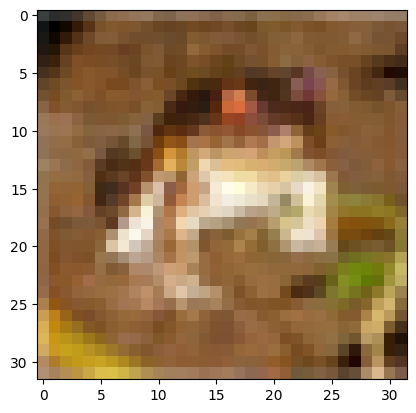

In [27]:
print(cifar10_train[0])
sample_in, sample_out = cifar10_train[0]
print(cifar10_train.classes[sample_out])
plt.imshow(sample_in)

### 2.2 Les Transformations

Particulièrement utiles sur les entrées complexes, telles que des images, du texte ou des données sonores, des *transformations* peuvent être construites afin d'être appliquées sur nos données. Ces transformations vous permettre de rendre lisibles ces données par un modèle statistique, mais elles permettent également d'ajouter de l'aléatoire dans la lecture des données, afin d'*augmenter* artificiellement la taille de notre échantillon (voir https://en.wikipedia.org/wiki/Data_augmentation)

Plusieurs transformations sont possibles pour les images (voir https://pytorch.org/vision/stable/transforms.html) et il est possible d'enchaîner ces transformations grâce à la classe `transforms.Compose`.

In [28]:
cifar10_train_transforms = transforms.Compose([
    # Coupe l'image en une image 32x32, avec un débordement possible de 4 pixels
    transforms.RandomCrop(32, padding=4),
    # Peut faire un miroir horizontal sur l'image, avec une chance d'1/2
    transforms.RandomHorizontalFlip(),
    # Transforme l'image en tenseur
    transforms.ToTensor(),
    # Standardise chaque couleur avec les moyennes et deviations standards
    # obtenues sur le jeu de données
    transforms.Normalize(
        mean=(0.4914, 0.4822, 0.4465),
        std=(0.2023, 0.1994, 0.2010)
    )
])

On peut maintenant affecter cette transformation lors de l'instanciation du jeu de données. A noter que cette transformation va s'appliquer à chaque fois que nous allons tirer des individus du jeu de données, i.e. en utilisant par exemple les crochets (par contre, les individus seront dans le format original dans l'attribut `cifar10_train_trs.data`).

In [29]:
cifar10_train_trs = datasets.CIFAR10(root="./cifar10_train/",
                                 train=True,
                                 download=True,
                                 transform=cifar10_train_transforms)

On effectue ici un tirage, et on regarde le résultat.

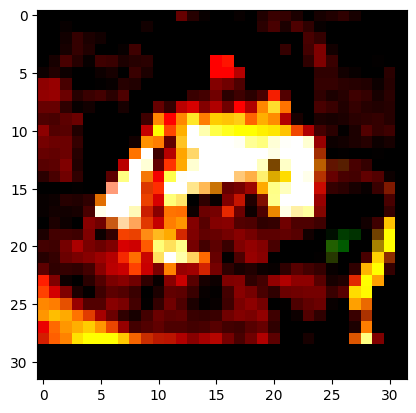

In [30]:
sample_in, sample_out = cifar10_train_trs[0]
plt.imshow(sample_in.permute(1, 2, 0))

Remarquez que, grâce à l'aléatoire, le même individu tiré une nouvelle fois peut subir d'autres transformations.

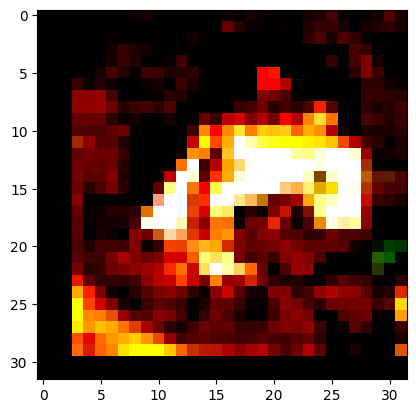

In [31]:
sample_in, sample_out = cifar10_train_trs[0]
plt.imshow(sample_in.permute(1, 2, 0))

### 2.3 La classe `Dataloader`

Généralement, on n'utilise pas l'objet `Dataset` directement, mais on va plutôt l'affecter à un objet de classe `Dataloader`, qui est un **conteneur itérable** sur nos données.

Ce conteneur itérable permet de tirer les données par petit sous-échantillons, appelés `batch`, mais permet également de définir certaine règles sur le tirage des individus.

On utilise l'instanciation suivante pour créer un conteneur itérable sur notre objet `cifar10_train_trs`, avec batch de 8 (batch_size=8) et un brassage des individus lorsque le jeu de données est entièrement tiré (`shuffle=True`).

In [32]:
cifar10_train_loader = DataLoader(cifar10_train_trs, batch_size=8, shuffle=True)

Comme tout conteneur itérable, on peut générer un iterateur avec la fonction `iter()`, puis piocher des individus dans celui-ci avec la fonction `next()`.

In [33]:
data_batch, labels_batch = next(iter(cifar10_train_loader))

Cette itération nous a donné 2 séries d'entrées et sorties correspondantes

In [34]:
print(data_batch.shape)
print(labels_batch.shape)

torch.Size([8, 3, 32, 32])
torch.Size([8])


Pour visuliser nos 8 entrées et sorties.

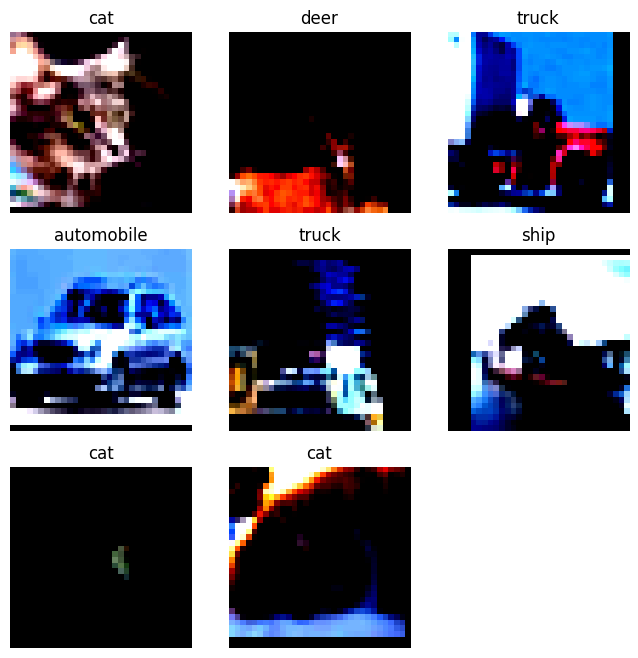

In [35]:
cols, rows = 3, 3
figure = plt.figure(figsize=(8, 8))
for i, data in enumerate(data_batch):
    figure.add_subplot(rows, cols, i + 1)
    plt.title(cifar10_train_trs.classes[labels_batch[i]])
    plt.axis("off")
    plt.imshow(data.permute(1, 2, 0))
plt.show()

En réalité, l'utilisation des objets `Dataloader` se fait à l'aide d'une boucle `for`, où l'on va alors itérer sur tous les objets du jeu de données. (ici, on se limite à 5 itérations, pour que cela reste lisible).

In [36]:
# Pour limiter la boucle
counter = 0
# On pourra entrainer dans des boucles de la sorte
for items, labels in cifar10_train_loader:
  print(items.shape)
  batch_named_labels = [cifar10_train_trs.classes[label] for label in labels]
  print(batch_named_labels)
  counter += 1
  if counter == 5:
    break

torch.Size([8, 3, 32, 32])
['bird', 'dog', 'ship', 'dog', 'automobile', 'airplane', 'dog', 'cat']
torch.Size([8, 3, 32, 32])
['deer', 'automobile', 'airplane', 'dog', 'ship', 'airplane', 'bird', 'cat']
torch.Size([8, 3, 32, 32])
['cat', 'airplane', 'deer', 'horse', 'bird', 'ship', 'bird', 'dog']
torch.Size([8, 3, 32, 32])
['airplane', 'ship', 'airplane', 'bird', 'cat', 'dog', 'horse', 'truck']
torch.Size([8, 3, 32, 32])
['ship', 'airplane', 'truck', 'airplane', 'airplane', 'automobile', 'cat', 'ship']


### 2.4 Une classe `Dataset` personalisée

Généralement, on va créer une classe personalisée héritée de la classe `Dataset`, afin de pouvoir utiliser plusieurs fonctions proposées par PyTorch (et `DataLoader`).

Il y a trois méthodes à implémenter :

* `__init__()` : Le constructeur, qui va mettre mémoire plusieurs éléments du jeu de données, comme les chemins d'accès, les transformations potentielles, et même parfois des éléments du jeu de données.
* `__len__(self)` : La méthode qui retourne le nombre d'individus dans le jeu de données. Cette méthode est appelée lorsque l'on utilise `len()`.
* `__getitem__(self, idx)` : Cette méthode est appelée lors de l'utilisation des crochets ou du `Dataloader()` et retourne l'élément à la position `idx`. C'est ici qu'on applique les transformations et que l'on précise où aller chercher les données si elles sont dans un endroit distant.

Dans notre exemple (on crée une classe pour charger "contraceptive.tsv"), nous effectuons déjà plusieurs pré-traitements sur les données lors de la construction de l'objet, car les transformations désirées sont invariantes et particulièrement simples. De plus, tout le jeu de données est stocké directement dans les attributs de l'objet, car il est suffisamment petit.



In [37]:
# Classe qui hérite de Dataset
class CustomDataset(Dataset):

  # Notre constructeur
  def __init__(self, file_path, transform=None, target_transform=None):
    # On charge le jeu de données
    all_data = pd.read_csv(file_path, sep="\t")
    # On constitue les entrées
    occ_dummies = pd.get_dummies(all_data["Husband_occupation"], prefix="occ")*1
    data = pd.concat([all_data.drop(["Husband_occupation", "target"],
                                    axis=1), occ_dummies], axis=1)
    self.data = torch.tensor(data.to_numpy(), dtype=torch.float32)
    # On constitue les sorties
    self.targets = torch.tensor((all_data["target"] - 1).to_numpy())
    # On sauve le noms des variables
    self.var_names = data.columns.tolist()
    # On constitue les classes
    self.classes = ["none", "long-term", "short_term"]
    # On sauve les transformations
    self.transform = transform
    self.target_transform = target_transform

  # Pour la longueur
  def __len__(self):
    return len(self.targets)

  # Pour le tirage des individus
  def __getitem__(self, idx):
    # On prend l'entrée et la sortie correspondant à l'indice
    item = self.data[idx, :]
    target = self.targets[idx]
    # On applique les éventuelles transformations
    if self.transform:
      item = self.transform(item)
    if self.target_transform:
      target = self.target_transform(target)
    return item, target


On peut maintenant créer une instance de cette classe avec le chemin d'accès à nos données. On peut voir que les crochets nous donnent bien un individu de notre jeu de données.

In [38]:
file_path = "/content/drive/MyDrive/Colab Notebooks/ml_data/TP8/contraceptive.tsv"
my_data = CustomDataset(file_path)
my_data[0]

(tensor([24.,  2.,  3.,  3.,  1.,  1.,  3.,  0.,  0.,  1.,  0.,  0.]),
 tensor(0))

On peut maintenant poser un `DataLoader` sur ce jeu de données, et tirer des exemples de ce dernier.

In [39]:
my_dataloader = DataLoader(my_data, batch_size=4, shuffle=True)

counter = 0
for items, labels in my_dataloader:
  print(items)
  print(labels)
  counter += 1
  if counter == 5:
    break

tensor([[47.,  4.,  4.,  1.,  0.,  1.,  4.,  0.,  1.,  0.,  0.,  0.],
        [32.,  3.,  4.,  5.,  1.,  1.,  2.,  0.,  1.,  0.,  0.,  0.],
        [34.,  4.,  4.,  2.,  1.,  1.,  4.,  0.,  1.,  0.,  0.,  0.],
        [25.,  2.,  4.,  3.,  1.,  1.,  3.,  0.,  1.,  0.,  0.,  0.]])
tensor([0, 1, 2, 2])
tensor([[29.,  2.,  4.,  2.,  1.,  0.,  4.,  1.,  0.,  0.,  0.,  1.],
        [34.,  4.,  3.,  0.,  0.,  0.,  3.,  0.,  0.,  0.,  1.,  0.],
        [28.,  2.,  4.,  0.,  1.,  1.,  1.,  0.,  0.,  0.,  1.,  0.],
        [35.,  4.,  4.,  4.,  1.,  1.,  4.,  0.,  1.,  0.,  0.,  0.]])
tensor([0, 0, 0, 2])
tensor([[26.,  3.,  4.,  2.,  1.,  1.,  3.,  0.,  1.,  0.,  0.,  0.],
        [28.,  4.,  4.,  0.,  0.,  0.,  4.,  0.,  1.,  0.,  0.,  0.],
        [28.,  4.,  4.,  4.,  1.,  1.,  4.,  0.,  0.,  0.,  1.,  0.],
        [46.,  1.,  2.,  3.,  1.,  1.,  1.,  1.,  0.,  1.,  0.,  0.]])
tensor([2, 0, 2, 0])
tensor([[42.,  4.,  4.,  5.,  1.,  1.,  4.,  0.,  1.,  0.,  0.,  0.],
        [39.,  4.,  4., 

Par la suite, on va utiliser ce jeu de données pour entrainer un modèle. On va donc séparer notre jeu de données en trois parties : entrainement (70%), validation (15%) et test (15%). On peut utiliser pour cela la fonction `random_split()` sur notre objet directement.

In [40]:
train_size = int(0.7 * len(my_data))
valid_size = int(0.15 * len(my_data))
test_size = len(my_data) - train_size - valid_size
my_data_train, my_data_valid, my_data_test = \
  random_split(my_data, [train_size, valid_size, test_size])

Les objets résultants sont toujours des instances de la classes `Dataset`

In [41]:
print(len(my_data_train), len(my_data_valid), len(my_data_test))
my_data_train[0]

1031 220 222


(tensor([21.,  3.,  4.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  1.,  0.]),
 tensor(0))

On peut donc créer trois itérateurs sur ces jeux de données, que nous utiliserons plus tard.

In [42]:
train_loader = DataLoader(my_data_train, batch_size=8, shuffle=True)
valid_loader =  DataLoader(my_data_valid, batch_size=8, shuffle=True)
test_loader =  DataLoader(my_data_test, batch_size=8, shuffle=True)

---

## 3. Les Modèles

Dans cette partie, nous allons enfin commencer à utiliser des modèles. Nous allons voir comment utiliser des modèles pré-entrainés, comment construire notre propre modèle, comment l'entrainer, l'évaluer puis faire des prédictions avec ce dernier. Pour finir, nous allons voir comment sauvegarder un modèle.

### 3.1 Les Modèles Pré-entrainés

Il existe de nombreux modèles pré-entrainés dans PyTorch (pour les images : https://pytorch.org/vision/stable/index.html; pour le texte : https://pytorch.org/text/stable/models.html; pour l'audio : https://pytorch.org/audio/stable/models.html). Ils peuvent se charger pré-entrainés, ou juste pour avoir la structure de ces derniers.

Ces modèles pré-entrainés peuvent servir de base pour de nouveau modèles, ou des parties peuvent être ré-utilisées dans de nouveau modèle, ou faire du *transfer learning*.

Ici, nous allons utiliser le modèle *Alexnet* (https://en.wikipedia.org/wiki/AlexNet et https://pytorch.org/hub/pytorch_vision_alexnet/) qui était le gagnant du concours ImageNet de 2012, avec une erreur moyenne top-5 de 15.3% (10.8 points meilleur que le modèle suivant).

Le modèle (pré-entrainé) se charge de façon suivante.

In [43]:
alexnet = models.alexnet(pretrained=True)

/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth


100%|██████████| 233M/233M [00:01<00:00, 193MB/s]


On peut afficher sa structure de la manière suivante.

In [44]:
print(alexnet)

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

Afin de comprendre les labels de sortie (1000 classes), on charge le document suivant, qui contient l'interprétation des labels.

In [45]:
with open("/content/drive/MyDrive/Colab Notebooks/"
          "ml_data/TP8/imagenet_class_labels.txt") as f:
  classes = [line.strip() for line in f.readlines()]

Les images entrées dans Alexnet, en format PIL, ont subis les transformations suivantes, que l'on redéfinit ici.

In [46]:
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225])
])

Une image (de citron) a été téléchargée depuis internet (libre à vous de tester une autre image). On la charge, la transforme, la transforme en batch (avec une taille de 1 pour la première dimension), puis on la passe dans Alexnet. On voit qu'en traduisant la sortie, celui-ci prédit la bonne classe avec 45% de certitude.

951: 'lemon', 45.035125732421875
950: 'orange', 36.466033935546875
945: 'bell pepper', 15.7482328414917
940: 'spaghetti squash', 0.6504407525062561
948: 'Granny Smith', 0.5691735148429871


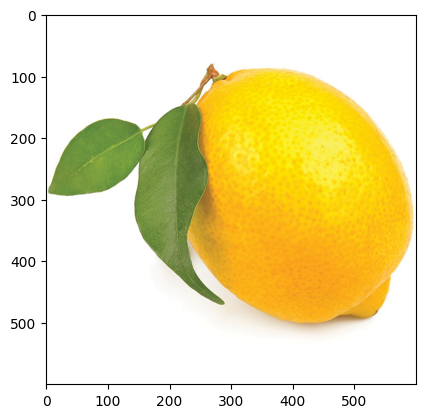

In [47]:
# On charge l'image et on la montre
img = Image.open("/content/drive/MyDrive/Colab Notebooks/ml_data/TP8/lemon.png")
plt.imshow(img)
# On transforme l'image en batch
img_tensor = transform(img)
img_batch = img_tensor.unsqueeze(0)
# On met le modèle en mode évaluation et on l'affecte au dispositif
alexnet.eval()
alexnet.to(device)
# On passe notre image en batch dans le modèle
y = alexnet(img_batch.to(device))
# On affiche les réponses les plus probables avec un softmax
prob = torch.nn.functional.softmax(y, dim=1)[0] * 100
_, indices = torch.sort(y, descending=True)
for i in indices[0][:5]:
  print(classes[i], prob[i].item())

### 3.2 Créer un modèle

On va maintenant créer un modèle très simple qui traitera notre jeu de données "contraception.tsv". Ce dernier se composera de :

* 12 neurones d'entrées
* Une couche de 12 neurones entièrement connectées, puis activation Relu
* Une couche de 6 neurones entièrement connectées, puis activation Relu
* Une couche de 3 neurones de sortie qui donnerons les log-odds.

Pour créer ce modèle, on va faire une classe héritée de `nn.Module`. Il faudra implémenter deux méthodes :

* `__init__(self)` : Le constructeur, qui définit les différentes couches entre les neurones. On utilise ici `nn.Linear(nb_inputs, nb_outputs)` qui créer des poids entre `nb_inputs` et `nb_outputs` neurones. Avant les déclarations, il ne faut pas oublier d'appeler le constructeur de la classe mère avec `super(MiniNet, self).__init__()`.

* `forward(self, x)` : La méthode qui effectue le passage en avant des données `x`. Ici, on définit les fonctions d'activation à ce niveau, mais il est aussi possible de les définir au niveau du constructeur (nous le verrons plus tard).

Notez que le résultat de notre modèle est ici en log-odd, car nous n'avons pas utilisé une activation de sortie *softmax*. La raison est que nous allons utiliser plus tard la fonctionnelle `nn.CrossEntropyLoss()` pour entrainer ce modèle, et que celle-ci prends en entrée (pour les prédictions) des log-odd (par contre, les vraies classes peuvent être donneés via leur label numérique dans cette fonctionnelle).

In [48]:
class MiniNet(nn.Module):

  def __init__(self):
    super(MiniNet, self).__init__() # On doit appeler le constructeur mère.
    self.full_1 = nn.Linear(12, 12) # entrées (12) -> première couche (12)
    self.full_2 = nn.Linear(12, 6) # première couche (12) -> deuxième couche (6)
    self.full_3 = nn.Linear(6, 3) # deuxième couche (6) -> sorties logit (3)

  def forward(self, x):
      z_1 = F.relu(self.full_1(x)) # z_1 est le relu de la 1ère couche
      z_2 = F.relu(self.full_2(z_1)) # z_2 est le relu de la 2ème couche
      z_3 = self.full_3(z_2) # z_3 est le résultat de la 3ème couche
      return z_3 # on retourne z_3

On affecte notre modèle au dispositif de calcul utilisé, puis on l'affiche.

In [49]:
mini_model = MiniNet().to(device)
print(mini_model)

MiniNet(
  (full_1): Linear(in_features=12, out_features=12, bias=True)
  (full_2): Linear(in_features=12, out_features=6, bias=True)
  (full_3): Linear(in_features=6, out_features=3, bias=True)
)


On voit qu'on peut déjà faire passer un individu de notre jeu de données dans le modèle. Seulement, comme les poids sont initilisés aléatoirement et que le modèle n'a pas été entrainé, le résultat sera aléatoire.

In [50]:
sample = my_data_test[0][0]
sample_batch = sample.unsqueeze(0)
logit_outputs = mini_model(sample_batch.to(device))
prob_outputs = nn.Softmax(dim=1)(logit_outputs)
print(my_data_test[0][1].item())
print(prob_outputs)

1
tensor([[0.4740, 0.1413, 0.3848]], device='cuda:0', grad_fn=<SoftmaxBackward0>)


### 3.3 Entrainer un modèle

Pour entrainer notre modèle, on doit maintenant définir la fonctionnelle de perte, qui sera `nn.CrossEntropyLoss()`. On doit également donner un optimisateur (parmi https://pytorch.org/docs/stable/optim.html), qui va dicter comment les poids sont mis à jour par rapport à leur gradient. On utilise ici la *descente du gradient stochastique* avec `torch.optim.SGD(mini_model.parameters(), lr=0.01)`, où les paramètres du modèle sont donnés, et le taux d'apprentissage est fixé à `lr=0.01`.

In [51]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(mini_model.parameters(), lr=0.01)

La boucle d'entrainement et validation s'effectue de la façon suivante :

In [52]:
# On définit le nombre d'epochs
n_epochs = 200
# Pour stocker les pertes d'entrainement et de validations (graphique à suivre)
train_losses = []
valid_losses = []
# La boucle sur les epochs
for epoch in range(n_epochs):

    # Entrainement

    # On met le modèle en mode entrainement
    mini_model.train()

    # Pour cumuler la perte
    train_loss = 0
    # Pour cumuler le nombre d'inidividus bien classés
    train_correct = 0
    # Boucle sur notre DataLoader d'entrainement
    for inputs, labels in train_loader:

        # On met nos tenseurs sur notre dispositif de calcul
        inputs = inputs.to(device)
        labels = labels.to(device)

        # On met les gradients à zéro (sinon ils s'accumulent)
        optimizer.zero_grad()

        # On calcule les log-odds de nos inputs
        logit_outputs = mini_model(inputs)
        # On calcule la perte
        loss = loss_fn(logit_outputs, labels)

        # On va maintenant propager le gradient
        loss.backward()
        # Et ajuster les poids selon l'optimisateur
        optimizer.step()

        # On ajoute la perte au cumul
        train_loss += loss.item()
        # On ajoute le nombre d'individus bien classés
        train_correct += (logit_outputs.argmax(1) == labels).sum().item()

    # Validation

    # On passe le modèle en mode évaluation (les poids ne bouge plus)
    mini_model.eval()

    # Pour cumuler la perte
    valid_loss = 0
    # Pour cumuler le nombre d'inidividus bien classés
    valid_correct = 0
    # Boucle sur notre DataLoader de validation
    for inputs, labels in valid_loader:

        # On met nos tenseurs sur notre dispositif de calcul
        inputs = inputs.to(device)
        labels = labels.to(device)

        # On calcule les log-odds de nos inputs
        logit_outputs = mini_model(inputs)
        # On calcule la perte
        loss = loss_fn(logit_outputs, labels)

        # On ajoute la perte au cumul
        valid_loss += loss.item()
        # On ajoute le nombre d'individus bien classés
        valid_correct += (logit_outputs.argmax(1) == labels).sum().item()


    # On stocke les pertes d'entrainement et de validations
    train_losses.append(train_loss / len(train_loader.dataset))
    valid_losses.append(valid_loss / len(valid_loader.dataset))

    # Si l'epoch est un multiple de 10, on affiche un message
    if epoch % 10 == 0:
      print(f"Epoch {epoch} : "
            f"train loss = {train_loss / len(train_loader.dataset):.4f} "
            f"train accuracy = {train_correct / len(train_loader.dataset):.3%} "
            f"valid loss = {valid_loss / len(valid_loader.dataset):.4f} "
            f"valid accuracy = {valid_correct / len(valid_loader.dataset):.3%} ")

Epoch 0 : train loss = 0.1330 train accuracy = 42.192% valid loss = 0.1339 valid accuracy = 43.182% 
Epoch 10 : train loss = 0.1272 train accuracy = 48.594% valid loss = 0.1257 valid accuracy = 47.727% 
Epoch 20 : train loss = 0.1230 train accuracy = 50.242% valid loss = 0.1213 valid accuracy = 51.818% 
Epoch 30 : train loss = 0.1214 train accuracy = 51.503% valid loss = 0.1268 valid accuracy = 51.364% 
Epoch 40 : train loss = 0.1186 train accuracy = 52.667% valid loss = 0.1187 valid accuracy = 56.364% 
Epoch 50 : train loss = 0.1182 train accuracy = 51.503% valid loss = 0.1216 valid accuracy = 55.455% 
Epoch 60 : train loss = 0.1177 train accuracy = 52.861% valid loss = 0.1145 valid accuracy = 55.909% 
Epoch 70 : train loss = 0.1162 train accuracy = 56.256% valid loss = 0.1185 valid accuracy = 54.545% 
Epoch 80 : train loss = 0.1154 train accuracy = 53.831% valid loss = 0.1207 valid accuracy = 52.273% 
Epoch 90 : train loss = 0.1147 train accuracy = 54.122% valid loss = 0.1146 valid a

On va maintenant afficher les courbes, le modèle ne semble pas être surajusté (mais on aurait pu s'arrêter avant).

[]

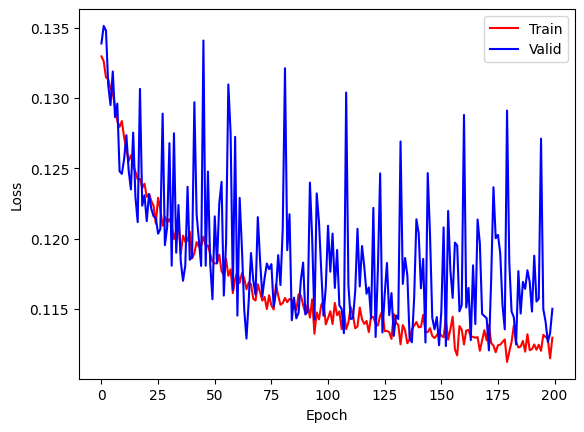

In [53]:
fig, ax = plt.subplots()
ax.plot(train_losses, c="red", label="Train")
ax.plot(valid_losses, c="blue", label="Valid")
ax.set_xlabel("Epoch")
ax.set_ylabel("Loss")
ax.legend()
plt.plot()

On va maintenant tester notre modèle entrainé sur le jeu de test.

In [54]:
# On met le modèle en mode évaluation
mini_model.eval()

# Pour cumuler le nombre d'inidividus bien classés
test_correct = 0
# Boucle sur notre DataLoader de test
for inputs, labels in test_loader:

  # On met nos tenseurs sur notre dispositif de calcul
  inputs = inputs.to(device)
  labels = labels.to(device)

  # On calcule les log-odds de nos inputs
  logit_outputs = mini_model(inputs)

  # On ajoute le nombre d'individus bien classés
  test_correct += (logit_outputs.argmax(1) == labels).sum().item()

# On calcule l'exactitude
test_accuracy = test_correct / len(test_loader.dataset)

# On l'affiche
print(f"Test Accuracy: {test_accuracy}")

Test Accuracy: 0.581081081081081


### 3.4 Sauver et charger un modèle

Une fois le modèle entrainer, on peut avoir envie de la sauvegarder afin de le réutiliser pour faire des prédictions (ou pour le partager). Il existe deux manières de faire des sauvegardes.

La première consiste à sauvegarder, via `torch.save()`, uniquement les **paramètres** du modèle, qui sont obtenus avec la méthode `state_dict()`. L'extension privilégiée pour sauvegarder un modèle PyTorch est `.pt` ou `.pth`.

In [55]:
weights_path = \
  "/content/drive/MyDrive/Colab Notebooks/ml_data/TP8/mini_model_weights.pth"
torch.save(mini_model.state_dict(), weights_path)

Avec cette méthode de sauvegarde, on doit d'abord instancier un modèle qui a la même structure, puis faire appel à la méthode `load_state_dict()` sur un `torch.load()` pour mettre à jour ses poids.

In [56]:
new_model = MiniNet()
new_model.load_state_dict(torch.load(weights_path, weights_only=True))
new_model.to(device)
print(new_model(sample_batch.to(device)))

tensor([[-0.2923,  0.8900,  0.1358]], device='cuda:0',
       grad_fn=<AddmmBackward0>)


L'autre manière de procéder est de sauvegarder entièrement le modèle, en appliquant `torch.save()` directement sur le modèle.

In [59]:
model_path = "/content/drive/MyDrive/Colab Notebooks/ml_data/TP8/mini_model.pth"
torch.save(mini_model, model_path)

On peut alors le charger directement avec `torch.load()`.

In [61]:
new_model2 = torch.load(model_path, weights_only=False)
print(new_model2(sample_batch.to(device)))

tensor([[-0.2923,  0.8900,  0.1358]], device='cuda:0',
       grad_fn=<AddmmBackward0>)


Bien que moins intuitive, la permière méthode de sauvegarde est privilégiée. En effet, la seconde méthode est très sensible à la moindre restructuration du code et présente des risques de sécurité.

---